In [1]:
import cv2
from google.colab import files
uploaded=files.upload()

Saving lotus-flower-pink-oil-500x500 (1).jpg to lotus-flower-pink-oil-500x500 (1).jpg


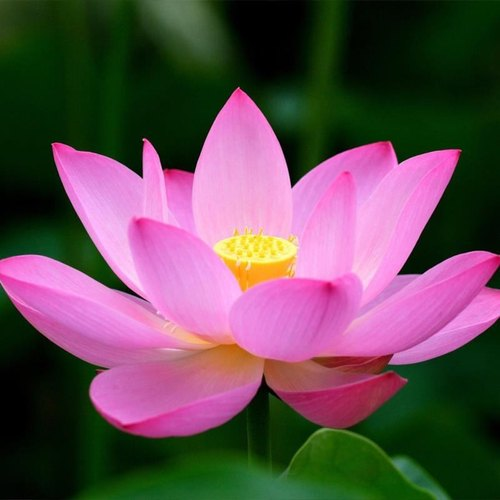

In [2]:
image = cv2.imread("lotus-flower-pink-oil-500x500 (1).jpg")
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [3]:
print("Image Properties")
print("- Number of Pixels: " + str(image.size))
print("- Shape/Dimensions: " + str(image.shape))
sz=image.size
print("- Size={}".format(sz))
(h, w, d) = image.shape
print("width={}, height={}, depth={}".format(w, h, d))

Image Properties
- Number of Pixels: 750000
- Shape/Dimensions: (500, 500, 3)
- Size=750000
width=500, height=500, depth=3


In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn
from sklearn.cluster import KMeans
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (10, 10
                                 ) 
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [5]:
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [6]:
number_of_colors = 10
modified_image = img.reshape(img.shape[0]*img.shape[1], 3)
clf = KMeans(n_clusters = number_of_colors)
labels = clf.fit_predict(modified_image)

In [7]:
counts = Counter(labels)

center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

([<matplotlib.patches.Wedge at 0x7fdf99e22510>,
 [Text(1.0951467379623152, 0.10321638595930517, '#ed85d8'),
  Text(0.9767276477633244, 0.5059674911441676, '#f6a5e5'),
  Text(-0.10888497898902841, 1.0945976709963159, '#993b49'),
  Text(-1.0997964287824553, 0.021161645431241608, '#052903'),
  Text(-0.8340178315491937, -0.7172267818883934, '#020e02'),
  Text(-0.5850847318873735, -0.9314912004481204, '#3c653c'),
  Text(-0.08332805918350353, -1.0968392929471076, '#184a0e'),
  Text(0.5633804370485331, -0.9447764196628766, '#f7cc55'),
  Text(0.9972784441727934, -0.4641505195389667, '#df66c0'),
  Text(1.098952576750238, -0.0479920207327514, '#c45a96')])

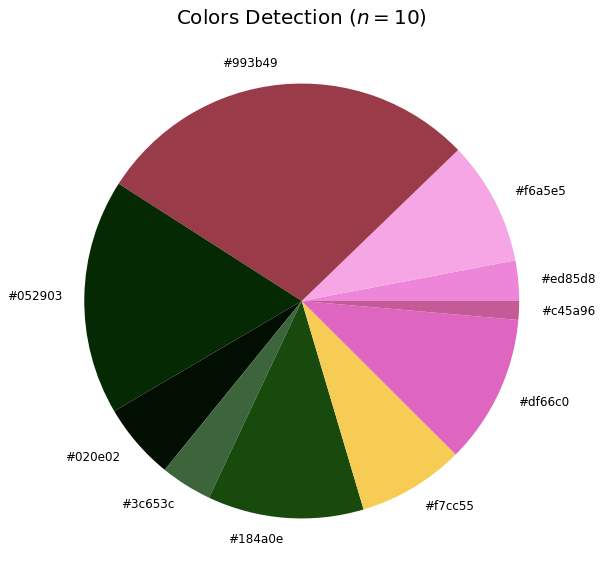

In [8]:
plt.title('Colors Detection ($n=10$)', fontsize=20)
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

In [9]:
for i in range(len(rgb_colors)):
    rgb_colors[i] = rgb_colors[i].astype(int)

In [10]:
def square_maker():
    inp_img = image
    h = int(inp_img.shape[0])
    step_h = int(h/10) 
    w = int(inp_img.shape[1])
    step_w = int(w/10) 
    X = np.arange(0,h+step_h,step_h)
    Y =np.arange(0,w+step_w,step_w)
    squares = [inp_img[0:step_h,0:step_w]]
    for i in range(0,len(X)-1):
        for j in range(0,len(Y)-1):
            squares.append(inp_img[X[i]:X[i+1],Y[j]:Y[j+1]])
    return np.array(squares)[1::]


In [11]:
def color_computing(array):
    DIFF = []
    squared_image = square_maker()
    for square in squared_image:
        DIFF_COLOR = []
        for color in range(len(rgb_colors)):
            diff = np.abs(square - rgb_colors[color])
            DIFF_COLOR.append(diff.mean())
        DIFF.append(DIFF_COLOR)
    return np.array(DIFF)

In [12]:
def best_color_plot(selected_slice):
    plt.subplot(1,2,1)
    plt.title('Retrieved Color')
    plt.imshow((np.zeros((16,16,3))+ rgb_colors[color_computing(image)[selected_slice].argmin()]).astype(int))
    plt.subplot(1,2,2)
    plt.title('Selected Square: '+ str(selected_slice))
    plt.imshow(square_maker()[selected_slice])

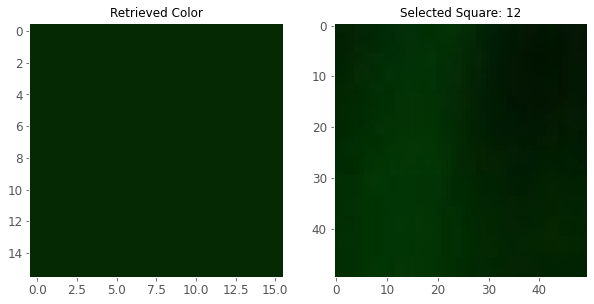

In [13]:
best_color_plot(12)

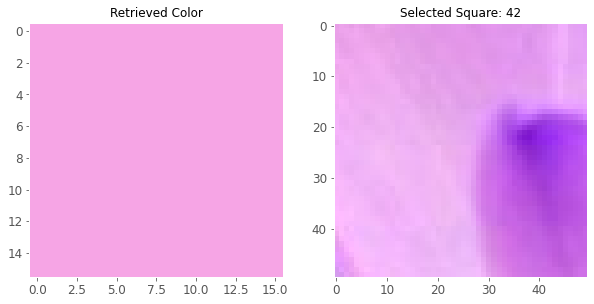

In [14]:
best_color_plot(42)

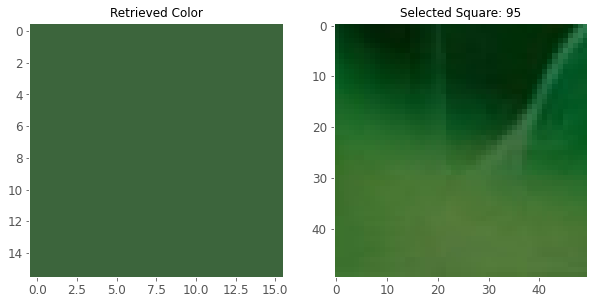

In [15]:
best_color_plot(95)

In [16]:
def build_summary():
    results = color_computing(image)
    cols = ['Square Number'] + hex_colors
    sorted_results = pd.DataFrame(columns= cols)
    k=0

    for r in results:
        d = {'Square Number':int(k)}
        for c in range(len(hex_colors)):
            d[hex_colors[c]] = r[c]*100/r.sum()
        sorted_results = sorted_results.append(d,ignore_index=True)
        k=k+1
    sorted_results['Square Number'] = sorted_results['Square Number'].astype(int)
    return sorted_results

In [17]:
df_summary=build_summary()

In [18]:
df_summary.head()

,Square Number,#ed85d8,#f6a5e5,#993b49,#052903,#020e02,#3c653c,#184a0e,#f7cc55,#df66c0,#c45a96
0,0,17.986718,19.958725,7.140827,1.702996,2.768552,4.657500,1.648043,16.160786,15.466932,12.508922
1,1,18.030358,19.907381,7.571394,0.834830,1.743114,5.343077,1.829124,16.292374,15.631941,12.816407
2,2,17.970417,19.870607,7.517741,1.159088,2.035202,5.132257,1.866690,16.210982,15.542397,12.694618
3,3,15.465878,17.754580,6.405602,7.319964,8.609063,2.674441,5.031567,13.535231,13.033140,10.170534
4,4,17.428704,19.296952,7.569642,2.431850,2.556593,4.871145,2.828140,15.698845,15.042052,12.276077


In [19]:
img=img.reshape((img.shape[1]*img.shape[0],3))

In [21]:
md=[]
for i in range(1,21):
  kmeans=KMeans(n_clusters=i,max_iter=20,n_init=10,random_state=0)
  kmeans.fit(img)
  o=kmeans.inertia_
  md.append(o)
print(md)

[5901559343.677709, 650666982.3182445, 398701348.57117176, 305842457.71204203, 232467237.13074455, 178494462.50254124, 151432220.33906248, 127962368.96836847, 110191306.77085775, 99686913.48116004, 91235331.5900875, 83832853.28598017, 79206877.75298643, 74531620.02800618, 69787287.03304379, 66034063.679310575, 62473315.07432124, 59189999.02801953, 56487835.5764464, 54567044.70795642]


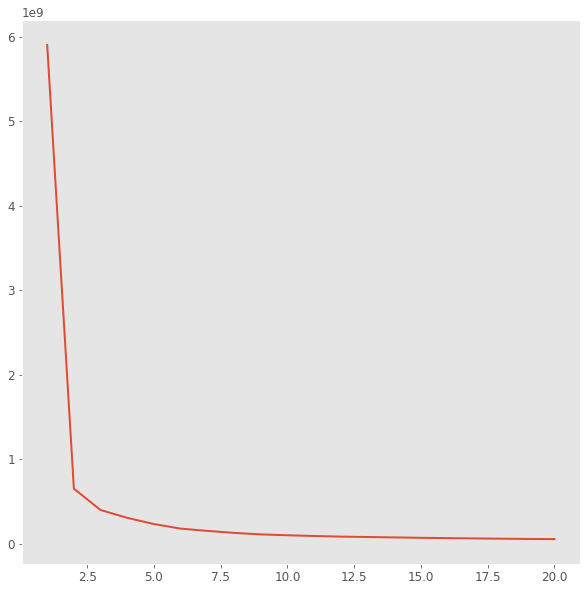

In [22]:
plt.plot(list(np.arange(1,21)),md)
plt.show()
